In [1]:
# Import Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Get Data 
df = pd.read_csv('C:/Users/cathe/Desktop/INF412_Final_Project_Data/clean_data.csv')

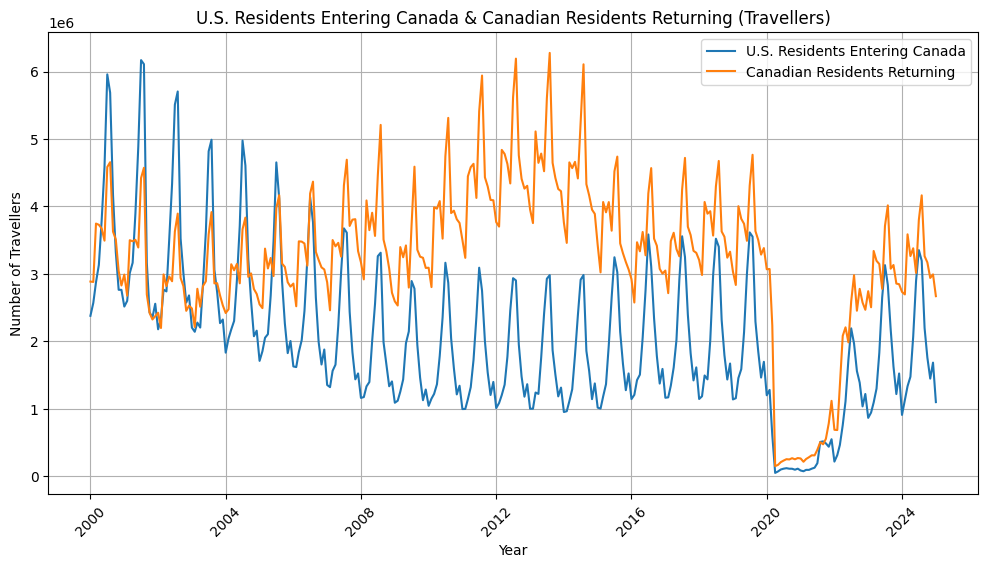

In [11]:
# Line graph showing United States of America residents entering Canada and Canadian residents returning from the United States of America

# Filter for 'Travellers' only
df_filtered = df[df["Traveller type"] == "Travellers"].copy()

# Collect needed columns 
cols_to_convert = [
    "United States of America residents entering Canada",
    "Canadian residents returning from the United States of America"
]

# Removes any commas from string values and convert each column into an integers 
for col in cols_to_convert:
    df_filtered[col] = df_filtered[col].str.replace(",", "").astype(int)

# Ensure the Reference period is in datetime format
df_filtered["Reference period"] = pd.to_datetime(df_filtered["Reference period"])

# Plotting the data
# Size of Graph 
plt.figure(figsize=(12, 6))
plt.plot(df_filtered["Reference period"], df_filtered["United States of America residents entering Canada"], 
         label="U.S. Residents Entering Canada")
plt.plot(df_filtered["Reference period"], df_filtered["Canadian residents returning from the United States of America"], 
         label="Canadian Residents Returning")

# Format Graph 
plt.xlabel("Year")
plt.ylabel("Number of Travellers")
plt.title("U.S. Residents Entering Canada & Canadian Residents Returning (Travellers)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

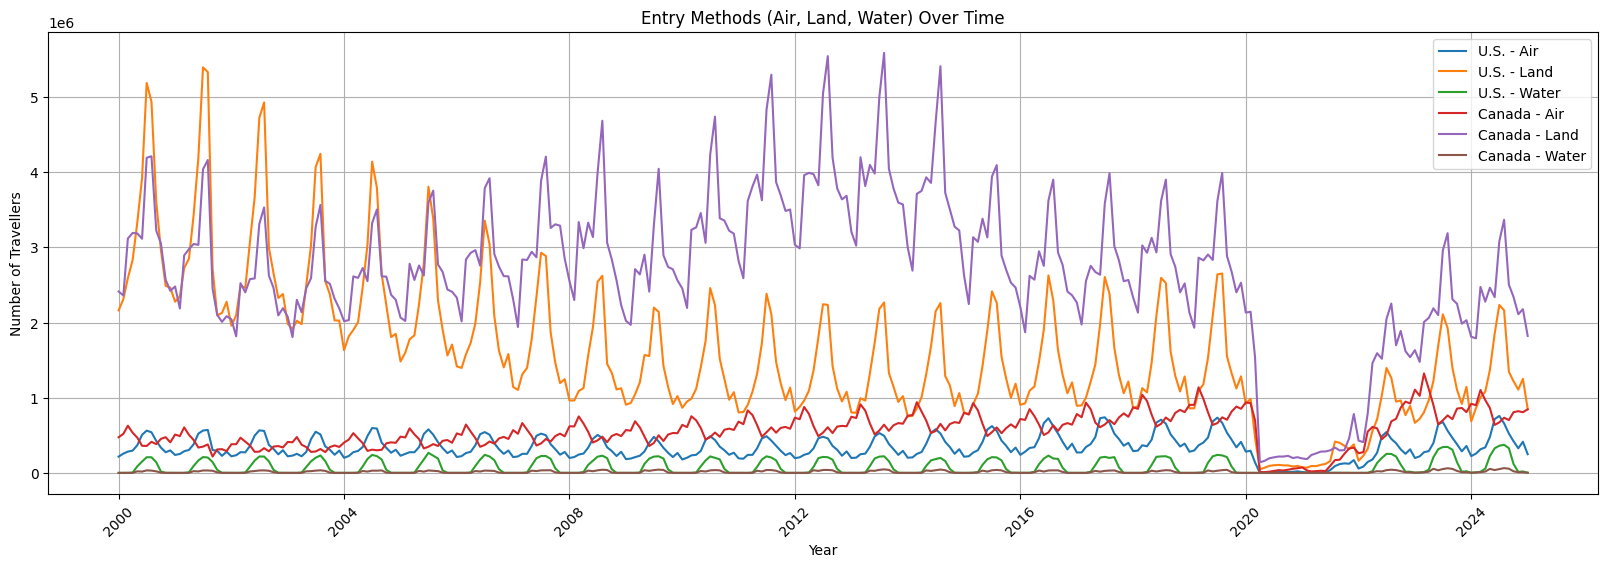

In [ ]:
# Entry Methods Over Time 

# Filter for 'Travellers' only
df_filtered = df[df["Traveller type"] == "Travellers"].copy()

# Collect needed columns 
travel_modes = [
    "United States of America residents, air",
    "United States of America residents, land",
    "United States of America residents, water",
    "Canadian residents returning from the United States of America, air",
    "Canadian residents returning from the United States of America, land",
    "Canadian residents returning from the United States of America, water",
]

# Removes any commas from string values and convert each column into an integers 
for col in travel_modes:
    df_filtered[col] = df_filtered[col].str.replace(",", "").astype(int)

# Ensure the Reference period is in datetime format
df_filtered["Reference period"] = pd.to_datetime(df_filtered["Reference period"])

# Plot line chart
# Size of graph 
plt.figure(figsize=(20, 6))

# U.S. residents entering Canada
plt.plot(df_filtered["Reference period"], df_filtered["United States of America residents, air"], label="U.S. - Air", linestyle="solid")
plt.plot(df_filtered["Reference period"], df_filtered["United States of America residents, land"], label="U.S. - Land", linestyle="solid")
plt.plot(df_filtered["Reference period"], df_filtered["United States of America residents, water"], label="U.S. - Water", linestyle="solid")

# Canadian residents returning from the U.S.
plt.plot(df_filtered["Reference period"], df_filtered["Canadian residents returning from the United States of America, air"], label="Canada - Air", linestyle="solid")
plt.plot(df_filtered["Reference period"], df_filtered["Canadian residents returning from the United States of America, land"], label="Canada - Land", linestyle="solid")
plt.plot(df_filtered["Reference period"], df_filtered["Canadian residents returning from the United States of America, water"], label="Canada - Water", linestyle="solid")

# Format Line Graph 
plt.xlabel("Year")
plt.ylabel("Number of Travellers")
plt.title("Entry Methods (Air, Land, Water) Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

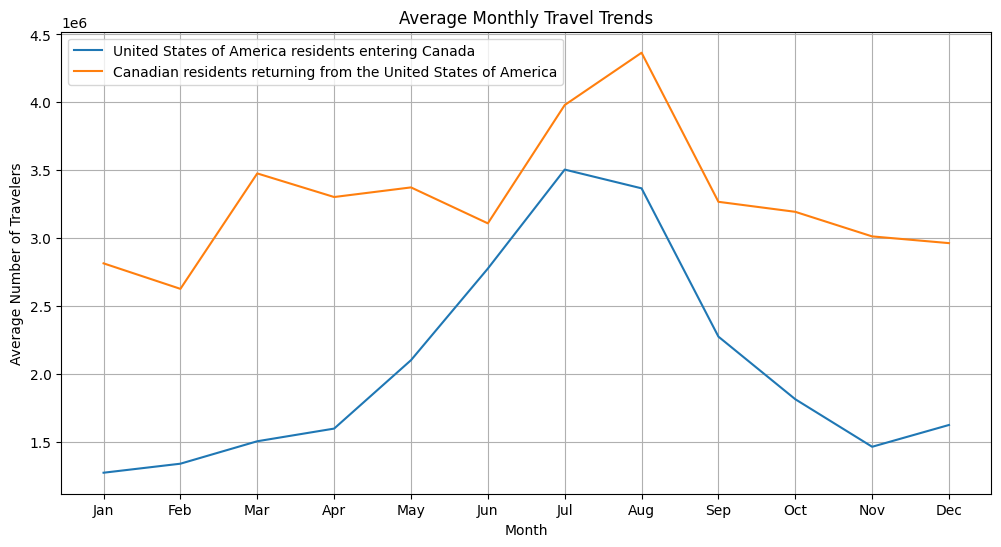

In [ ]:
# Average Monthly Travel Trends 

# Ensure the Reference period is in datetime format
df_filtered["Reference period"] = pd.to_datetime(df_filtered["Reference period"])

# Convert needed columns 
travel_modes = [
    "United States of America residents entering Canada",
    "Canadian residents returning from the United States of America"
]

# Removes any commas from string values and convert each column into an integers 
for col in travel_modes:
    df_filtered[col] = df_filtered[col].str.replace(",", "").astype(int)

# Extract month and group by month to calculate the average
df_filtered["Month"] = df_filtered["Reference period"].dt.month
monthly_avg = df_filtered.groupby("Month")[travel_modes].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
# plotting monthly average 
for col in travel_modes:
    plt.plot(monthly_avg.index, monthly_avg[col], label=col)

# Structure Graph 
plt.xlabel("Month")
plt.ylabel("Average Number of Travelers")
plt.title("Average Monthly Travel Trends")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]) # renaming by month 
plt.legend()
plt.grid(True)
plt.show()


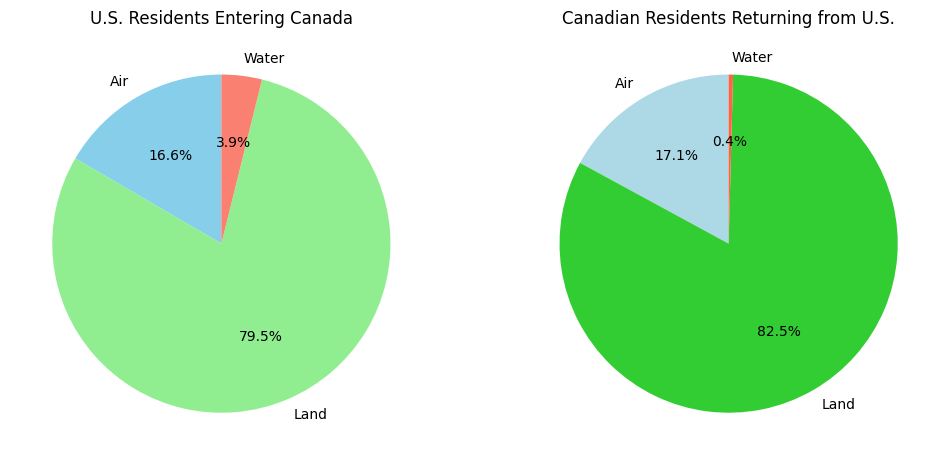

In [ ]:
# PIE CHARTS 

# Filter for 'Travellers' only
df_filtered = df[df["Traveller type"] == "Travellers"].copy()

# Collect all travel modes 
travel_modes = [
    "United States of America residents, air",
    "United States of America residents, land",
    "United States of America residents, water",
    "Canadian residents returning from the United States of America, air",
    "Canadian residents returning from the United States of America, land",
    "Canadian residents returning from the United States of America, water",
]

# Removes any commas from string values and convert each column into an integers 
for col in travel_modes:
    df_filtered[col] = df_filtered[col].str.replace(",", "").astype(int)

# Preparing data for plotting the sum across all years (2000-2025)
labels = ["Air", "Land", "Water"]

# United States of America residents
us_data = [
    df_filtered[travel_modes[0]].sum(),
    df_filtered[travel_modes[1]].sum(),
    df_filtered[travel_modes[2]].sum(),
]

# Canada residents
canada_data = [
    df_filtered[travel_modes[3]].sum(),
    df_filtered[travel_modes[4]].sum(),
    df_filtered[travel_modes[5]].sum(),
]

# Create Pie Charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Structure output so that pie charts are beside each other 
# Use autopct="%1.1f%%" to display the percentages with one decimal point 
# U.S. Residents Pie Chart (left) 
axes[0].pie(us_data, labels=labels, autopct="%1.1f%%", startangle=90, colors=["skyblue", "lightgreen", "salmon"])
axes[0].set_title("U.S. Residents Entering Canada")

# Canadian Residents Pie Chart (right)
axes[1].pie(canada_data, labels=labels, autopct="%1.1f%%", startangle=90, colors=["lightblue", "limegreen", "tomato"])
axes[1].set_title("Canadian Residents Returning from U.S.")

# Plot graphs 
plt.show()
